In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install scikit-learn==1.6.1



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 114.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [3]:
import sklearn 
print(sklearn.__version__)


1.6.1


In [4]:
!pip install joblib
!pip install wfdb



# model 2 classes

In [5]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/mitdb-features-2/qtdb_features.csv')  # update the path if needed
df2 = pd.read_csv('/kaggle/input/mitdb-features-2/mitdb_features.csv')

df = pd.concat([df1, df2], ignore_index=True)

In [6]:
# Define abnormal beats (all non-'N' types)
df['target'] = df['type'].apply(lambda x: 0 if x == 'N' else 1)

# Drop unnecessary columns
X = df.drop(['record_name', 'beat_number', 'type', 'target','R_reel'], axis=1)
y = df['target']


In [7]:
X.columns

Index(['R_index', 'start', 'end', 'qrs_start', 'qrs_end', 'p_start', 'p_end',
       't_start', 't_end', 'Duree_P_ms', 'Duree_QRS_ms', 'Duree_T_ms',
       'Intervalle_PR_ms', 'Intervalle_QT_ms', 'Intervalle_ST_ms', 'P_index',
       'Amplitude_P', 'Amplitude_R', 'Intervalle_RR_ms', 'Q_index',
       'Amplitude_Q', 'S_index', 'Amplitude_S', 'T_index', 'Amplitude_T',
       'T/R_ratio', 'P/R_ratio', 'QRS_area', 'Slope_QR', 'Slope_RS',
       'P_symmetry', 'T_inversion', 'QRS_axis_estimate', 'Heart_rate_bpm',
       'Premature_beat', 'Local_RR_variability', 'Local_RMSSD', 'Bigeminy',
       'Trigeminy'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
'''
v3:
precision    recall  f1-score   support

           0       0.98      0.99      0.99     14600
           1       0.98      0.96      0.97      7008

    accuracy                           0.98     21608
   macro avg       0.98      0.98      0.98     21608
weighted avg       0.98      0.98      0.98     21608

[[14494   106]
 [  259  6749]]
 
 '''

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35453
           1       0.98      0.95      0.96      8288

    accuracy                           0.99     43741
   macro avg       0.98      0.97      0.98     43741
weighted avg       0.99      0.99      0.99     43741

[[35282   171]
 [  432  7856]]


'\nv3:\nprecision    recall  f1-score   support\n\n           0       0.98      0.99      0.99     14600\n           1       0.98      0.96      0.97      7008\n\n    accuracy                           0.98     21608\n   macro avg       0.98      0.98      0.98     21608\nweighted avg       0.98      0.98      0.98     21608\n\n[[14494   106]\n [  259  6749]]\n \n '

In [12]:
import numpy as np

# Assuming y_test and y_pred are numpy arrays or pandas Series
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Get indices where prediction != actual
wrong_indices = np.where(y_test != y_pred)[0]

# Print or extract misclassified examples
print("Total misclassified samples:", len(wrong_indices))

# If you want the actual values too:
for i in wrong_indices[:5]:
    print(f"Index {i}: True label = {y_test[i]}, Predicted = {y_pred[i]}")


Total misclassified samples: 603
Index 35: True label = 1, Predicted = 0
Index 74: True label = 1, Predicted = 0
Index 119: True label = 0, Predicted = 1
Index 126: True label = 0, Predicted = 1
Index 160: True label = 1, Predicted = 0


In [13]:
import numpy as np

# Get misclassified indices
misclassified_indices = np.where(y_test != y_pred)[0]

# Recover original DataFrame indices
original_indices = X_test.index[misclassified_indices]

# Extract rows from the original df
misclassified_rows = df.loc[original_indices, ['record_name', 'beat_number', 'type', 'R_reel']].copy()

# Add predicted and true labels
misclassified_rows['True_Label'] = y_test[misclassified_indices]
misclassified_rows['Predicted_Label'] = y_pred[misclassified_indices]

# View sample
misclassified_rows[misclassified_rows.True_Label==0]


,record_name,beat_number,type,R_reel,True_Label,Predicted_Label
32416,sel30,943,N,210189.0,0,1
202896,222,2503,N,430510.0,0,1
177340,209,2740,N,410195.0,0,1
55420,sel44,861,N,146725.0,0,1
123024,105,1716,N,305845.0,0,1
...,...,...,...,...,...,...
68019,sel821,609,N,87650.0,0,1
46665,sel37,607,N,207385.0,0,1
123098,105,1790,N,317825.0,0,1
175123,209,523,N,79652.0,0,1


In [14]:
import joblib

# Save model
joblib.dump(model, 'ecg_classifier_model.pkl')
print("Model saved successfully!")


Model saved successfully!


# 3 class

In [15]:
import pandas as pd


df1 = pd.read_csv('/kaggle/input/mitdb-features-2/qtdb_features.csv')  # update the path if needed
df2 = pd.read_csv('/kaggle/input/mitdb-features-2/mitdb_features.csv')

df = pd.concat([df1, df2], ignore_index=True)

def map_type(x):
    if x == 'N':
        return 0
    elif x == '/':
        return 1
    else:
        return 2

df['target'] = df['type'].apply(map_type)

# Drop unnecessary columns
X = df.drop(['record_name', 'beat_number', 'type', 'target','R_reel'], axis=1)
y = df['target']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
'''
v3:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14600
           1       0.99      0.99      0.99      1400
           2       0.98      0.95      0.97      5608

    accuracy                           0.98     21608
   macro avg       0.98      0.98      0.98     21608
weighted avg       0.98      0.98      0.98     21608

[[14496     0   104]
 [    6  1382    12]
 [  256    13  5339]]
'''

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35453
           1       1.00      0.99      0.99      1768
           2       0.97      0.93      0.95      6520

    accuracy                           0.99     43741
   macro avg       0.99      0.97      0.98     43741
weighted avg       0.99      0.99      0.99     43741

[[35287     0   166]
 [   15  1751     2]
 [  433     8  6079]]


'\nv3:\n              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99     14600\n           1       0.99      0.99      0.99      1400\n           2       0.98      0.95      0.97      5608\n\n    accuracy                           0.98     21608\n   macro avg       0.98      0.98      0.98     21608\nweighted avg       0.98      0.98      0.98     21608\n\n[[14496     0   104]\n [    6  1382    12]\n [  256    13  5339]]\n'

In [18]:
import joblib

# Save model
joblib.dump(model, 'ecg_3_class_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# all classes

In [19]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df1 = pd.read_csv('/kaggle/input/mitdb-features-2/qtdb_features.csv')  # update the path if needed
df2 = pd.read_csv('/kaggle/input/mitdb-features-2/mitdb_features.csv')

df = pd.concat([df1, df2], ignore_index=True)
le = LabelEncoder()
df['target'] = le.fit_transform(df['type'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

df['target'] = df['target'].replace({11: 20, 17: 20})
class_counts = df['target'].value_counts()
class_counts

{'!': 0, '+': 1, '/': 2, 'A': 3, 'E': 4, 'F': 5, 'J': 6, 'L': 7, 'N': 8, 'Q': 9, 'R': 10, 'S': 11, 'V': 12, 'a': 13, 'e': 14, 'f': 15, 'j': 16, 'x': 17, '|': 18, '~': 19, nan: 20}


target
8     177260
2       8839
12      8366
7       8004
10      7923
3       3270
20      2022
15      1243
5       1030
16       225
13       130
4         86
6         86
0         85
9         29
18        27
1         26
19        25
14        25
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df1 = pd.read_csv('/kaggle/input/mitdb-features-2/qtdb_features.csv')  # update the path if needed
df2 = pd.read_csv('/kaggle/input/mitdb-features-2/mitdb_features.csv')

df = pd.concat([df1, df2], ignore_index=True)

class_map = {
    'N': 0,
    'L': 1,
    'R': 2,
    '/': 3,
    'V': 4,
    'rest':5
}


# Map known classes, and assign others as 'rest'
df['target'] = df['type'].apply(lambda x: class_map.get(x, 5)) 

class_counts = df['target'].value_counts()
class_counts

target
0    177260
3      8839
4      8366
5      8309
1      8004
2      7923
Name: count, dtype: int64

In [21]:

# Drop unnecessary columns
X = df.drop(['record_name', 'beat_number', 'type', 'target','R_reel'], axis=1)
y = df['target']
# Merge class 11 and 17 into 20


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
'''
v3:
    precision    recall  f1-score   support

           0       0.97      1.00      0.99     14600
           1       1.00      0.96      0.98      1601
           2       0.99      0.98      0.99      1449
           3       0.99      0.99      0.99      1400
           4       0.95      0.95      0.95      1348
           5       0.96      0.76      0.85      1210

    accuracy                           0.98     21608
   macro avg       0.98      0.94      0.96     21608
weighted avg       0.98      0.98      0.98     21608

[[14552     1     7     0    18    22]
 [   63  1530     0     0     7     1]
 [   25     0  1421     1     0     2]
 [    5     2     0  1391     2     0]
 [   50     2     1     5  1274    16]
 [  238     2     4     7    39   920]]
'''


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35453
           1       1.00      0.94      0.97      1601
           2       0.99      0.97      0.98      1584
           3       0.99      0.98      0.99      1768
           4       0.94      0.93      0.93      1673
           5       0.94      0.75      0.83      1662

    accuracy                           0.98     43741
   macro avg       0.97      0.93      0.95     43741
weighted avg       0.98      0.98      0.98     43741

[[35358     3     4     1    39    48]
 [   93  1502     1     3     1     1]
 [   50     0  1533     0     1     0]
 [   21     2     0  1741     1     3]
 [   95     0     0     0  1550    28]
 [  351     2     3    13    54  1239]]


'\nv3:\n    precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99     14600\n           1       1.00      0.96      0.98      1601\n           2       0.99      0.98      0.99      1449\n           3       0.99      0.99      0.99      1400\n           4       0.95      0.95      0.95      1348\n           5       0.96      0.76      0.85      1210\n\n    accuracy                           0.98     21608\n   macro avg       0.98      0.94      0.96     21608\nweighted avg       0.98      0.98      0.98     21608\n\n[[14552     1     7     0    18    22]\n [   63  1530     0     0     7     1]\n [   25     0  1421     1     0     2]\n [    5     2     0  1391     2     0]\n [   50     2     1     5  1274    16]\n [  238     2     4     7    39   920]]\n'

In [24]:
import joblib

# Save model
joblib.dump(model, 'ecg_multi_class_model.pkl')
print("Model saved successfully!")

Model saved successfully!


# Status

## display beat functions

In [25]:
import matplotlib.pyplot as plt
import numpy as np
def plot_beat_with_features(signal, mask, beat_features, fs, window_start=0):

    time = np.arange(len(signal)) / fs

    plt.figure(figsize=(15, 5))
    plt.plot(time, signal, color='black', label='ECG Signal', alpha=0.8)

    # Mask indices
    p_indices = np.where(mask == 1)[0]
    qrs_indices = np.where(mask == 2)[0]
    t_indices = np.where(mask == 3)[0]

    # --- Highlight P wave
    if len(p_indices) > 0:
        plt.plot(time[p_indices], signal[p_indices], color='blue', label='P Wave', linewidth=2, alpha=0.6)

    # --- Highlight QRS
    if len(qrs_indices) > 0:
        plt.plot(time[qrs_indices], signal[qrs_indices], color='red', label='QRS Complex', linewidth=2, alpha=0.6)

    # --- Highlight T wave
    if len(t_indices) > 0:
        plt.plot(time[t_indices], signal[t_indices], color='green', label='T Wave', linewidth=2, alpha=0.6)

    # --- Duration bars
    if len(p_indices) > 0:
        plt.axvspan(time[p_indices[0]], time[p_indices[-1]], color='blue', alpha=0.1, label='Durée P')
    if len(qrs_indices) > 0:
        plt.axvspan(time[qrs_indices[0]], time[qrs_indices[-1]], color='red', alpha=0.1, label='Durée QRS')
    if len(t_indices) > 0:
        plt.axvspan(time[t_indices[0]], time[t_indices[-1]], color='green', alpha=0.1, label='Durée T')

    # --- P and R peak markers
    print("beat_features: ", beat_features)
    if 'P_index' in beat_features and beat_features['P_index'] is not None :
        p_idx = int(beat_features['P_index']) - window_start
        if 0 <= p_idx < len(signal):
            plt.plot(time[p_idx], signal[p_idx], 'bo', label='P Peak')
            plt.annotate(f'P Peak\n{signal[p_idx]:.2f}', (time[p_idx], signal[p_idx]),
                        textcoords="offset points", xytext=(0, 10), ha='center', color='blue')

    if 'R_index' in beat_features and beat_features['R_index'] is not None :
        r_idx = int(beat_features['R_index']) - window_start
        if 0 <= r_idx < len(signal):
            plt.plot(time[r_idx], signal[r_idx], 'ro', label='R Peak')
            plt.annotate(f'R Peak\n{signal[r_idx]:.2f}', (time[r_idx], signal[r_idx]),
                        textcoords="offset points", xytext=(0, 10), ha='center', color='red')

    if 'R_reel' in beat_features and beat_features['R_reel'] is not None:
        r_idx = int(beat_features['R_reel']) - window_start
        if 0 <= r_idx < len(signal):
            plt.plot(time[r_idx], signal[r_idx], 'yo', label='R Reel')
            plt.annotate(f'R Reel\n{signal[r_idx]:.2f}', (time[r_idx], signal[r_idx]),
                        textcoords="offset points", xytext=(0, 10), ha='center', color='yellow')
    if 'Q_index' in beat_features and beat_features['Q_index'] is not None:
        q_idx = int(beat_features['Q_index']) - window_start
        if 0 <= q_idx < len(signal):
            plt.plot(time[q_idx], signal[q_idx], 'mo', label='Q Peak')
            plt.annotate(f'Q Peak\n{signal[q_idx]:.2f}', (time[q_idx], signal[q_idx]),
                         textcoords="offset points", xytext=(0, 10), ha='center', color='magenta')

    if 'S_index' in beat_features and beat_features['S_index'] is not None:
        s_idx = int(beat_features['S_index']) - window_start
        if 0 <= s_idx < len(signal):
            plt.plot(time[s_idx], signal[s_idx], 'co', label='S Peak')
            plt.annotate(f'S Peak\n{signal[s_idx]:.2f}', (time[s_idx], signal[s_idx]),
                         textcoords="offset points", xytext=(0, 10), ha='center', color='cyan')


    if 'T_index' in beat_features and beat_features['T_index'] is not None:
        t_idx = int(beat_features['T_index']) - window_start
        if 0 <= t_idx < len(signal):
            plt.plot(time[t_idx], signal[t_idx], 'go', label='T Peak')
            plt.annotate(f'T Peak\n{signal[t_idx]:.2f}', (time[t_idx], signal[t_idx]),
                        textcoords="offset points", xytext=(0, 10), ha='center', color='green')


    # --- Interval lines (flat)
    y_level = min(signal) - 0.2  # slightly below signal
    if len(p_indices) > 0 and len(qrs_indices) > 0:
      plt.hlines(y_level, time[p_indices[0]], time[qrs_indices[0]], colors='purple', linestyles='--', label='Intervalle PR')
    if len(qrs_indices) > 0 and len(t_indices) > 0:
        plt.hlines(y_level - 0.2, time[qrs_indices[0]], time[t_indices[-1]], colors='orange', linestyles=':', label='Intervalle QT')
        plt.hlines(y_level - 0.4, time[qrs_indices[-1]], time[t_indices[0]], colors='green', linestyles='-.', label='Intervalle ST')

        # --- Final Touch
    plt.title("Visualisation d'un battement ECG avec caractéristiques")
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()

    # Enforce min y-range of 5
    ymin = min(signal)
    ymax = max(signal)
    if ymax - ymin < 10:
        midpoint = (ymin + ymax) / 2
        plt.ylim(midpoint - 5, midpoint + 5)

    plt.show()

In [26]:

import wfdb
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.signal import resample
import os
from tqdm import tqdm
def bandpass_filter(signal, lowcut=0.5, highcut=10, fs=250, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)
def smooth_signal(data, window_size=5):
    # Smooth the signal using a moving average filter
    window = np.ones(window_size) / window_size
    smoothed = np.convolve(data, window, mode='same')
    return smoothed
def normalize_signal(data):
    """
    Normalize the signal using z-score normalization.
    """
    return (data - np.mean(data)) / np.std(data)
def resample_signal(signal, original_fs, target_fs):
    num_samples = int(len(signal) * target_fs / original_fs)
    resampled_signal = resample(signal, num_samples)
    return resampled_signal

In [27]:
def makemask(lenth, feat ):
    freq = 250  # Hz
    ms_per_sample = 1000 / freq  # 4 ms per sample
    
    # Assume 'beat' is your row, a pandas Series
    start_global = feat['start']
    end_global = feat['end']
    
    Q_index = feat['Q_index']
    S_index = feat['S_index']
    Intervalle_ST_ms = feat['Intervalle_ST_ms']
    Intervalle_PR_ms = feat['Intervalle_PR_ms']
    
    
    # Start and End
    P_start = start_global 
    P_end = P_start + feat['Duree_P_ms']/ ms_per_sample
    QRS_start =  P_start + Intervalle_PR_ms / ms_per_sample
    
    # T start
    T_start = end_global - feat['Duree_T_ms']/ ms_per_sample
    T_end = end_global
    QRS_end = T_end - Intervalle_ST_ms / ms_per_sample
    
    # Results
    P_start -=start_global
    P_end -=start_global
    QRS_start -=start_global
    QRS_end -=start_global
    T_start -=start_global
    T_end-=start_global
    
    
    mask = np.zeros(lenth)
    mask [int(P_start):int(P_end)]=1
    mask [int(QRS_start):int(QRS_end)]=2
    mask [int(T_start):int(T_end)]=3
    
    return mask

    
    

In [28]:
import wfdb
def display_beat(record_name,beat_number,Type="m"):
    
    feat = df[(df['record_name'] == record_name) & (df['beat_number'] == beat_number)].iloc[0]
    if feat is not None:
        start, end = feat['start'], feat['end']
        record = []
        if Type=="m":
            mitdb_path = "/kaggle/input/qtdb-ludb/physionet.org/files/mitdb/1.0.0/"
        else:
            mitdb_path = "/kaggle/input/qtdb-ludb/physionet.org/files/qtdb/1.0.0/"
            
        record_name = mitdb_path+str(record_name)
        record = wfdb.rdrecord(record_name)# Run prediction
        
        #record = wfdb.rdrecord(edb_path+'e0129')# Run prediction
        
        signal = record.p_signal[:, 0]  # lead I
        fs = record.fs
        
        #signal=signal[int(start):int(end)]
        if fs != 250:
                  signal = resample_signal(signal, original_fs=fs, target_fs=250)
                  fs = 250
        signal = normalize_signal(smooth_signal(bandpass_filter(signal, fs=fs)))
        mask = makemask(end-start,feat)
        plot_beat_with_features(
          signal[start:end],
          mask,
          beat_features=feat,
          fs=fs,
          window_start=start
        ) 
        
    else:
        print("no beat")
    

## display beats


In [29]:

import pandas as pd


df1 = pd.read_csv('/kaggle/input/mitdb-features-2/qtdb_features.csv')  # update the path if needed
df2 = pd.read_csv('/kaggle/input/mitdb-features-2/mitdb_features.csv')

df = pd.concat([df1, df2], ignore_index=True)

# Calculate the absolute difference between 'R_reel' and 'R_index'
df['R_diff'] = abs(df['R_reel'] - df['R_index'])
# Get counts of each unique difference
distance_counts = df['R_diff'].value_counts()

# Display the result
print(distance_counts)


R_diff
1.0      74085
0.0      52077
2.0      28870
3.0      11493
4.0       8060
         ...  
165.0        1
474.0        1
424.0        1
156.0        1
217.0        1
Name: count, Length: 184, dtype: int64


In [30]:
#df_filtered = df[(df['R_diff'] > 20) & (df['R_diff'] < 40) & (df['type'] == "N")  ]
df_filtered = df[(df['R_diff'] > 10) ] # v3: 11566 
print(" far r_index:",df_filtered.count()['record_name'])
print(" close r_index:",df[(df['R_diff'] <= 10) ].count()['record_name'])
df_filtered

 far r_index: 20918
 close r_index: 196488


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


,record_name,beat_number,type,R_reel,R_index,start,end,qrs_start,qrs_end,p_start,...,P_symmetry,T_inversion,QRS_axis_estimate,Heart_rate_bpm,Premature_beat,Local_RR_variability,Local_RMSSD,Bigeminy,Trigeminy,R_diff
1158,sel102,26,/,5754.0,5743,5693,5849,5718,5787,5693.0,...,1.344773,0,0.440341,70.422535,0,22.627417,33.941125,0,0,11.0
1223,sel102,91,/,19206.0,19195,19151,19297,19174,19255,19151.0,...,1.382927,0,0.429127,67.264574,0,10.498677,14.422205,0,0,11.0
1327,sel102,195,/,40698.0,40687,40639,40787,40659,40714,40639.0,...,1.395314,0,0.476086,75.000000,0,12.364825,20.000000,0,0,11.0
1394,sel102,262,/,54475.0,54264,54240,54600,54448,54502,54240.0,...,20.516562,1,-0.598917,357.142857,1,190.475429,282.899275,0,0,211.0
1396,sel102,264,/,54907.0,54892,54852,55005,54872,54940,54852.0,...,1.705755,0,0.377920,70.754717,0,658.801606,1069.624233,1,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215937,233,2626,V,448474.0,448374,448326,448557,448435,448501,448326.0,...,-4.431459,0,-0.322460,51.903114,0,292.307296,566.681568,1,0,100.0
215944,233,2633,V,449661.0,449558,449508,449747,449614,449689,449508.0,...,-0.365452,0,-0.247251,102.040816,0,11.313708,16.970563,1,0,103.0
215951,233,2640,V,450859.0,450756,450704,450938,450814,450888,450704.0,...,0.745437,0,-0.323063,99.337748,0,152.711784,284.154887,1,0,103.0
217931,234,1979,V,322914.0,322799,322751,322998,322885,322964,322751.0,...,-6.623019,0,0.460771,90.361446,0,4.988877,6.324555,0,0,115.0


beat_features:  record_name                sel102
beat_number                   300
type                            /
R_reel                    62338.0
R_index                     62339
start                       62297
end                         62451
qrs_start                   62320
qrs_end                     62391
p_start                   62297.0
p_end                     62319.0
t_start                   62405.0
t_end                     62451.0
Duree_P_ms                   92.0
Duree_QRS_ms                288.0
Duree_T_ms                  188.0
Intervalle_PR_ms             92.0
Intervalle_QT_ms            524.0
Intervalle_ST_ms             56.0
P_index                     62310
Amplitude_P             -0.125975
Amplitude_R              2.673947
Intervalle_RR_ms            856.0
Q_index                     62322
Amplitude_Q             -0.493472
S_index                     62375
Amplitude_S             -1.534841
T_index                     62434
Amplitude_T              0.17379

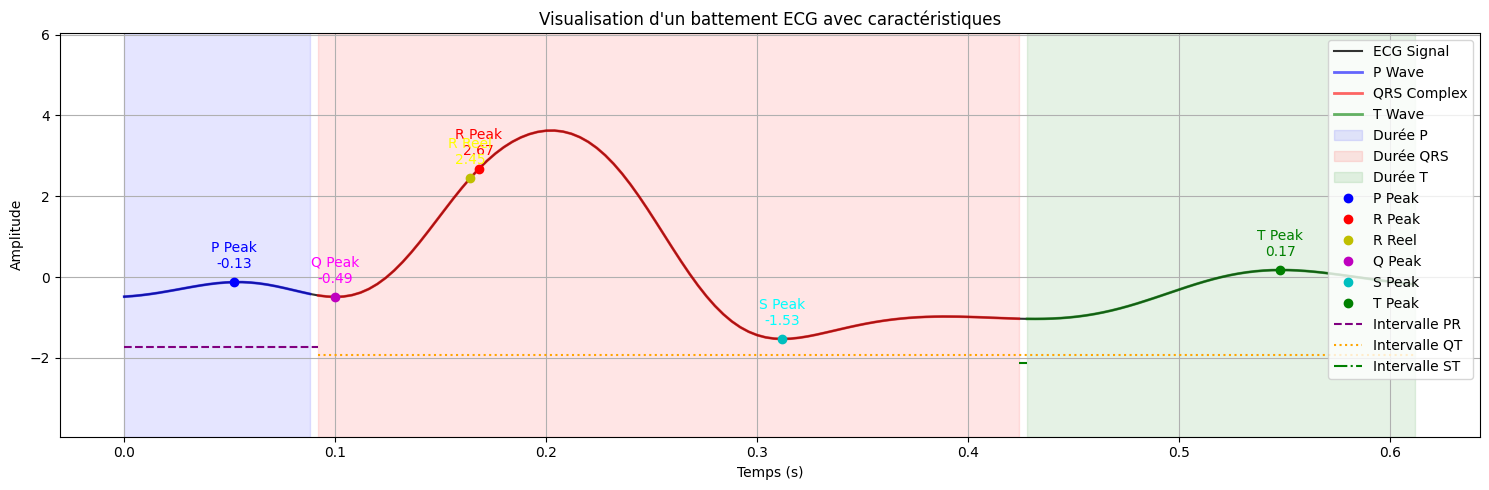

In [31]:
display_beat("sel102",300   ,Type="p")

In [32]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/27 08:11:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [33]:
df2=spark.createDataFrame(df)

In [34]:
df2.printSchema()

root
 |-- record_name: string (nullable = true)
 |-- beat_number: long (nullable = true)
 |-- type: string (nullable = true)
 |-- R_reel: double (nullable = true)
 |-- R_index: long (nullable = true)
 |-- start: long (nullable = true)
 |-- end: long (nullable = true)
 |-- qrs_start: long (nullable = true)
 |-- qrs_end: long (nullable = true)
 |-- p_start: double (nullable = true)
 |-- p_end: double (nullable = true)
 |-- t_start: double (nullable = true)
 |-- t_end: double (nullable = true)
 |-- Duree_P_ms: double (nullable = true)
 |-- Duree_QRS_ms: double (nullable = true)
 |-- Duree_T_ms: double (nullable = true)
 |-- Intervalle_PR_ms: double (nullable = true)
 |-- Intervalle_QT_ms: double (nullable = true)
 |-- Intervalle_ST_ms: double (nullable = true)
 |-- P_index: long (nullable = true)
 |-- Amplitude_P: double (nullable = true)
 |-- Amplitude_R: double (nullable = true)
 |-- Intervalle_RR_ms: double (nullable = true)
 |-- Q_index: long (nullable = true)
 |-- Amplitude_Q: double

In [35]:
df=df2

In [36]:
from pyspark.sql.functions import col
print(df.filter(df.R_diff<=10).count())
print(df.filter((col("R_diff")>10) & (col("R_diff")<=20)).count())
print(df.filter((col("R_diff")>20)).count())


25/05/27 08:12:00 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/05/27 08:12:01 WARN TaskSetManager: Stage 0 contains a task of very large size (16441 KiB). The maximum recommended task size is 1000 KiB.


196488


25/05/27 08:12:04 WARN TaskSetManager: Stage 3 contains a task of very large size (16441 KiB). The maximum recommended task size is 1000 KiB.


16448


25/05/27 08:12:06 WARN TaskSetManager: Stage 6 contains a task of very large size (16441 KiB). The maximum recommended task size is 1000 KiB.


5765


In [37]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()


25/05/27 08:12:10 WARN TaskSetManager: Stage 9 contains a task of very large size (16441 KiB). The maximum recommended task size is 1000 KiB.


+-----------+-----------+----+------+-------+-----+---+---------+-------+-------+-----+-------+-----+----------+------------+----------+----------------+----------------+----------------+-------+-----------+-----------+----------------+-------+-----------+-------+-----------+-------+-----------+---------+---------+--------+--------+--------+----------+-----------+-----------------+--------------+--------------+--------------------+-----------+--------+---------+------+
|record_name|beat_number|type|R_reel|R_index|start|end|qrs_start|qrs_end|p_start|p_end|t_start|t_end|Duree_P_ms|Duree_QRS_ms|Duree_T_ms|Intervalle_PR_ms|Intervalle_QT_ms|Intervalle_ST_ms|P_index|Amplitude_P|Amplitude_R|Intervalle_RR_ms|Q_index|Amplitude_Q|S_index|Amplitude_S|T_index|Amplitude_T|T/R_ratio|P/R_ratio|QRS_area|Slope_QR|Slope_RS|P_symmetry|T_inversion|QRS_axis_estimate|Heart_rate_bpm|Premature_beat|Local_RR_variability|Local_RMSSD|Bigeminy|Trigeminy|R_diff|
+-----------+-----------+----+------+-------+-----+-